100%|██████████| 3/3 [00:30<00:00, 10.27s/it]


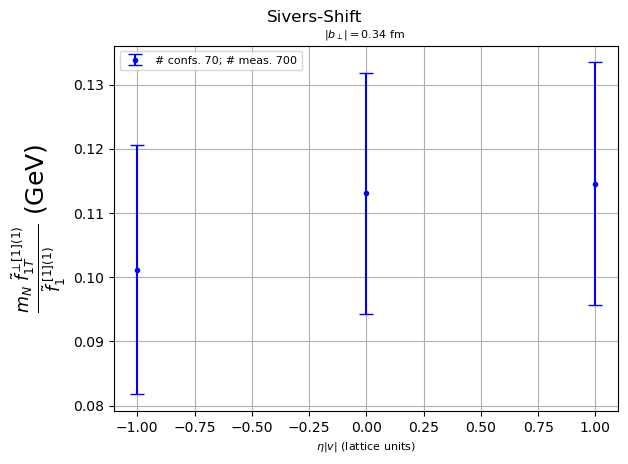

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from contextlib import ExitStack
from tqdm import tqdm
#lattice size a
a = 0.114

# plateau_fit
def plateau_fit(x, plateau_value):
    return np.full_like(x, plateau_value)



sources = [[0, 0, 0, 0], [8, 0, 0, 0], [16, 0, 0, 0], [24, 0, 0, 0], [0, 8, 0, 0], [0, 16, 0, 0], [0, 24, 0, 0], [0, 0, 8, 0], [0, 0, 16, 0], [0, 0, 24, 0]]

q = [0,0,0,0]
tsnk = 10
t = 10
psnk = [-1,0,0,0]
#b = 3




def extract_2pt_cfg_list():
    with ExitStack() as stack:
        no_cfgs = 0
        list_cfg_G2_t_psnk = []
        for stream in range(0,1):
            for cfgs in range(1776, 2052+1, 4): #1984 #2092
                if stream == 0:
                    #file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt_2pt_b_0{b}0_eta_n00_gnStapleFWprop_g5BWadjpropg5_psnk_m1_0_0_cfg_b_{cfgs}_.h5"
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt__b_3_-2_0__v_03_0_1_eta9m9_cfg_a_corrected_{cfgs-440}_.h5"
                    cfg = cfgs - 440
                elif stream == 1:
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt_2pt_b_030_eta_n00_gnStapleFWprop_g5BWadjpropg5_psnk_m1_0_0_cfg_a_{cfgs-440}_.h5"
                    cfg = cfgs - 440
                h5_file = stack.enter_context(h5py.File(file_path, "r"))
                no_cfgs = no_cfgs + 1
                per_src_G2_t_psnk = []
                for csrc in sources:
                    path_to_G2_t_psnk_c_vector = f"/cfg_{cfg}/TwoPT_proton3/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}"
                    c_array_G2_t_psnk = h5_file[path_to_G2_t_psnk_c_vector]
                    real_array_G2_t_psnk = (c_array_G2_t_psnk[()]).real
                    per_src_G2_t_psnk.append(real_array_G2_t_psnk[tsnk])
                list_cfg_G2_t_psnk.append(np.mean(per_src_G2_t_psnk))
    return list_cfg_G2_t_psnk, no_cfgs

def extract_3pts_cfg_list_sivers(tau, eta):
    with ExitStack() as stack:
        list_cfg_G3_U_gp_real = []
        list_cfg_G3_D_gp_real = []
        list_cfg_G3_U_gp_imag = []
        list_cfg_G3_D_gp_imag = []
        no_cfgs = 0
        for stream in range(0,1):
            for cfgs in range(1776, 2052+1, 4): #2080
                if stream == 0:
                    #file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt_2pt_b_0{b}0_eta_n00_gnStapleFWprop_g5BWadjpropg5_psnk_m1_0_0_cfg_b_{cfgs}_.h5"
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt__b_3_-2_0__v_03_0_1_eta9m9_cfg_a_corrected_{cfgs-440}_.h5"
                    cfg = cfgs - 440
                elif stream == 1:
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt_2pt_b_030_eta_n00_gnStapleFWprop_g5BWadjpropg5_psnk_m1_0_0_cfg_a_{cfgs-440}_.h5"
                    cfg = cfgs - 440
                h5_file = stack.enter_context(h5py.File(file_path, "r"))
                no_cfgs = no_cfgs + 1
                per_src_G3_U_gp_real = []
                per_src_G3_D_gp_real = []
                per_src_G3_U_gp_imag = []
                per_src_G3_D_gp_imag = []
                for csrc in sources:
                    
                    ## gamma 3 (n=4)
                    # 3pt U quark
                    path_to_G3_U_vector_g3 = f"/cfg_{cfg}/ThreePT_flavor_U/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{1}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_U_g3 = h5_file[path_to_G3_U_vector_g3]
                    real_array_G3_U_g3_real = (c_array_G3_U_g3[()]).real
                    real_array_G3_U_g3_imag = (c_array_G3_U_g3[()]).imag
                    
                    # 3pt D quark
                    path_to_G3_D_vector_g3 = f"/cfg_{cfg}/ThreePT_flavor_D/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{1}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_D_g3 = h5_file[path_to_G3_D_vector_g3]
                    real_array_G3_D_g3_real = (c_array_G3_D_g3[()]).real
                    real_array_G3_D_g3_imag = (c_array_G3_D_g3[()]).imag
                    
                    ## gamma 4 (n=8)
                    # 3pt U quark
                    path_to_G3_U_vector_g4 = f"/cfg_{cfg}/ThreePT_flavor_U/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{8}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_U_g4 = h5_file[path_to_G3_U_vector_g4]
                    real_array_G3_U_g4_real = (c_array_G3_U_g4[()]).real
                    real_array_G3_U_g4_imag = (c_array_G3_U_g4[()]).imag
                    
                    # 3pt D quark
                    path_to_G3_D_vector_g4 = f"/cfg_{cfg}/ThreePT_flavor_D/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{8}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_D_g4 = h5_file[path_to_G3_D_vector_g4]
                    real_array_G3_D_g4_real = (c_array_G3_D_g4[()]).real
                    real_array_G3_D_g4_imag = (c_array_G3_D_g4[()]).imag

                    per_src_G3_U_gp_real.append((-real_array_G3_U_g3_imag[tau]+real_array_G3_U_g4_real[tau])/(np.sqrt(2)))
                    per_src_G3_D_gp_real.append((-real_array_G3_D_g3_imag[tau]+real_array_G3_D_g4_real[tau])/(np.sqrt(2)))
                    per_src_G3_U_gp_imag.append((real_array_G3_U_g3_real[tau]+real_array_G3_U_g4_imag[tau])/(np.sqrt(2)))
                    per_src_G3_D_gp_imag.append((real_array_G3_D_g3_real[tau]+real_array_G3_D_g4_imag[tau])/(np.sqrt(2)))
                    
                list_cfg_G3_U_gp_real.append(np.mean(per_src_G3_U_gp_real))
                list_cfg_G3_D_gp_real.append(np.mean(per_src_G3_D_gp_real))
                list_cfg_G3_U_gp_imag.append(np.mean(per_src_G3_U_gp_imag))
                list_cfg_G3_D_gp_imag.append(np.mean(per_src_G3_D_gp_imag))
                   
             
    return list_cfg_G3_U_gp_real, list_cfg_G3_D_gp_real, list_cfg_G3_U_gp_imag, list_cfg_G3_D_gp_imag, no_cfgs

def extract_3pts_cfg_list_sivers_(tau, eta):
    with ExitStack() as stack:
        list_cfg_G3_U_gp_real = []
        list_cfg_G3_D_gp_real = []
        list_cfg_G3_U_gp_imag = []
        list_cfg_G3_D_gp_imag = []
        
        no_cfgs = 0
        for stream in range(0,1):
            for cfgs in range(1776, 2052+1, 4): #2080
                if stream == 0:
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt_2pt_b_0{b}0_eta_n00_gnStapleFWprop_g5BWadjpropg5_psnk_m1_0_0_cfg_b_{cfgs}_.h5"
                    cfg = cfgs
                elif stream == 1:
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt_2pt_b_020_eta_n00_gnStapleFWprop_BWadjprop_psnk_m1_0_0_cfg_a_{cfgs-440}_.h5"
                    cfg = cfgs - 440
                
                h5_file = stack.enter_context(h5py.File(file_path, "r"))
                no_cfgs = no_cfgs + 1
                #per_src_G3_U_gp_real = []
                #per_src_G3_D_gp_real = []
                #per_src_G3_U_gp_imag = []
                #per_src_G3_D_gp_imag = []
                
                per_src_real_array_G3_U_g3_imag = []
                per_src_real_array_G3_D_g3_imag = []
                per_src_real_array_G3_U_g3_real = []
                per_src_real_array_G3_D_g3_real = []
                per_src_real_array_G3_U_g4_imag = []
                per_src_real_array_G3_D_g4_imag = []
                per_src_real_array_G3_U_g4_real = []
                per_src_real_array_G3_D_g4_real = []
                for csrc in sources:
                    
                    ## gamma 3 (n=4)
                    # 3pt U quark
                    path_to_G3_U_vector_g3 = f"/cfg_{cfg}/ThreePT_flavor_U/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{1}/qx{q[0]}_qy{q[1]}_qz{q[2]}/b{b}/eta{eta}"
                    c_array_G3_U_g3 = h5_file[path_to_G3_U_vector_g3]
                    real_array_G3_U_g3_real = (c_array_G3_U_g3[()]).real
                    real_array_G3_U_g3_imag = (c_array_G3_U_g3[()]).imag
                    
                    # 3pt D quark
                    path_to_G3_D_vector_g3 = f"/cfg_{cfg}/ThreePT_flavor_D/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{1}/qx{q[0]}_qy{q[1]}_qz{q[2]}/b{b}/eta{eta}"
                    c_array_G3_D_g3 = h5_file[path_to_G3_D_vector_g3]
                    real_array_G3_D_g3_real = (c_array_G3_D_g3[()]).real
                    real_array_G3_D_g3_imag = (c_array_G3_D_g3[()]).imag
                    
                    ## gamma 4 (n=8)
                    # 3pt U quark
                    path_to_G3_U_vector_g4 = f"/cfg_{cfg}/ThreePT_flavor_U/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{8}/qx{q[0]}_qy{q[1]}_qz{q[2]}/b{b}/eta{eta}"
                    c_array_G3_U_g4 = h5_file[path_to_G3_U_vector_g4]
                    real_array_G3_U_g4_real = (c_array_G3_U_g4[()]).real
                    real_array_G3_U_g4_imag = (c_array_G3_U_g4[()]).imag
                    
                    # 3pt D quark
                    path_to_G3_D_vector_g4 = f"/cfg_{cfg}/ThreePT_flavor_D/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{8}/qx{q[0]}_qy{q[1]}_qz{q[2]}/b{b}/eta{eta}"
                    c_array_G3_D_g4 = h5_file[path_to_G3_D_vector_g4]
                    real_array_G3_D_g4_real = (c_array_G3_D_g4[()]).real
                    real_array_G3_D_g4_imag = (c_array_G3_D_g4[()]).imag

                    #per_src_G3_U_gp_real.append((-real_array_G3_U_g3_imag[tau]+real_array_G3_U_g4_real[tau])/(np.sqrt(2)))
                    #per_src_G3_D_gp_real.append((-real_array_G3_D_g3_imag[tau]+real_array_G3_D_g4_real[tau])/(np.sqrt(2)))
                    #per_src_G3_U_gp_imag.append((real_array_G3_U_g3_real[tau]+real_array_G3_U_g4_imag[tau])/(np.sqrt(2)))
                    #per_src_G3_D_gp_imag.append((real_array_G3_D_g3_real[tau]+real_array_G3_D_g4_imag[tau])/(np.sqrt(2)))
                    
                    per_src_real_array_G3_U_g3_imag.append(real_array_G3_U_g3_imag[tau])
                    per_src_real_array_G3_D_g3_imag.append(real_array_G3_D_g3_imag[tau])
                    per_src_real_array_G3_U_g3_real.append(real_array_G3_U_g3_real[tau])
                    per_src_real_array_G3_D_g3_real.append(real_array_G3_D_g3_real[tau])
                    per_src_real_array_G3_U_g4_imag.append(real_array_G3_U_g4_imag[tau])
                    per_src_real_array_G3_D_g4_imag.append(real_array_G3_D_g4_imag[tau])
                    per_src_real_array_G3_U_g4_real.append(real_array_G3_U_g4_real[tau])
                    per_src_real_array_G3_D_g4_real.append(real_array_G3_D_g4_real[tau])
                    
                list_cfg_G3_U_gp_real.append((-np.mean(per_src_real_array_G3_U_g3_imag)+np.mean(per_src_real_array_G3_U_g4_real))/(np.sqrt(2)))
                list_cfg_G3_D_gp_real.append((-np.mean(per_src_real_array_G3_D_g3_imag)+np.mean(per_src_real_array_G3_D_g4_real))/(np.sqrt(2)))
                list_cfg_G3_U_gp_imag.append((np.mean(per_src_real_array_G3_U_g3_real)+np.mean(per_src_real_array_G3_U_g4_imag))/(np.sqrt(2)))
                list_cfg_G3_D_gp_imag.append((np.mean(per_src_real_array_G3_D_g3_real)+np.mean(per_src_real_array_G3_D_g4_imag))/(np.sqrt(2)))
                   
             
    return list_cfg_G3_U_gp_real, list_cfg_G3_D_gp_real, list_cfg_G3_U_gp_imag, list_cfg_G3_D_gp_imag, no_cfgs


def jackknife_ratio_for_tau_3pt_2pt(tau, eta):
    #2pt
    list_cfg_G2_t_psnk, no_cfgs = extract_2pt_cfg_list()
    
    #3pt
    list_cfg_G3_U_gp_real, list_cfg_G3_D_gp_real, list_cfg_G3_U_gp_imag, list_cfg_G3_D_gp_imag, no_cfgs = extract_3pts_cfg_list_sivers(tau, eta)
    
    #ratio 3pt to 2pt
    G3_U_D_gp_real = ((np.mean(list_cfg_G3_U_gp_real))-(np.mean(list_cfg_G3_D_gp_real)))/np.mean(list_cfg_G2_t_psnk)
    G3_U_D_gp_imag = ((np.mean(list_cfg_G3_U_gp_imag))-(np.mean(list_cfg_G3_D_gp_imag)))/np.mean(list_cfg_G2_t_psnk)
    
    # making jackknife set
    sigma_square_Ratio_gp_real = 0
    sigma_square_Ratio_gp_imag = 0
    for i in range(len(list_cfg_G3_U_gp_real)): #Jackknife
        #ratio 3pt to 2pt
        jkknife_G3_U_D_gp_real = ((np.mean( list_cfg_G3_U_gp_real[:(i)] + list_cfg_G3_U_gp_real[(i+1):] ))-(np.mean( list_cfg_G3_D_gp_real[:(i)] + list_cfg_G3_D_gp_real[(i+1):] )))/(np.mean( list_cfg_G2_t_psnk[:(i)] + list_cfg_G2_t_psnk[(i+1):] ))
        jkknife_G3_U_D_gp_imag = ((np.mean( list_cfg_G3_U_gp_imag[:(i)] + list_cfg_G3_U_gp_imag[(i+1):] ))-(np.mean( list_cfg_G3_D_gp_imag[:(i)] + list_cfg_G3_D_gp_imag[(i+1):] )))/(np.mean( list_cfg_G2_t_psnk[:(i)] + list_cfg_G2_t_psnk[(i+1):] ))
    
        sigma_square_Ratio_gp_real = sigma_square_Ratio_gp_real + np.square(G3_U_D_gp_real-jkknife_G3_U_D_gp_real)
        sigma_square_Ratio_gp_imag = sigma_square_Ratio_gp_imag + np.square(G3_U_D_gp_imag-jkknife_G3_U_D_gp_imag)
    error_G3_U_D_gp_real = np.sqrt(((no_cfgs-1)/(no_cfgs))*sigma_square_Ratio_gp_real)
    error_G3_U_D_gp_imag = np.sqrt(((no_cfgs-1)/(no_cfgs))*sigma_square_Ratio_gp_imag)
    return G3_U_D_gp_real, error_G3_U_D_gp_real, G3_U_D_gp_imag, error_G3_U_D_gp_imag, no_cfgs

def ratio_3pt_2pt_plateau_with_plot(plateau_t_i_re, plateau_t_f_re, plateau_t_i_im, plateau_t_f_im, eta):
    G3_U_D_gp_real_list = []
    error_G3_U_D_gp_real_list = []
    G3_U_D_gp_imag_list = []
    error_G3_U_D_gp_imag_list = []
    for tau in (range(0, tsnk+1)):
        G3_U_D_gp_real, error_G3_U_D_gp_real, G3_U_D_gp_imag, error_G3_U_D_gp_imag, no_cfgs = jackknife_ratio_for_tau_3pt_2pt(tau, eta)
        G3_U_D_gp_real_list.append(G3_U_D_gp_real)
        error_G3_U_D_gp_real_list.append(error_G3_U_D_gp_real)
        G3_U_D_gp_imag_list.append(G3_U_D_gp_imag)
        error_G3_U_D_gp_imag_list.append(error_G3_U_D_gp_imag)
    
    time_for_plot = list(range(0, tsnk+1))
    plt.subplots(figsize=(16, 7),dpi=300)
    plt.errorbar(time_for_plot, G3_U_D_gp_real_list, yerr = error_G3_U_D_gp_real_list, fmt='o', markersize=8, capsize=10, color='blue', label= "real")
    plt.errorbar(time_for_plot, G3_U_D_gp_imag_list, yerr = error_G3_U_D_gp_imag_list, fmt='o', markersize=8, capsize=10, color='red', label= "imag")
    plt.grid(True) 
    plt.legend()
    plt.show()   
    ####################### Curve fitting #######################
    time_for_plateau_re = list(range(plateau_t_i_re, plateau_t_f_re + 1))
    time_for_plateau_im = list(range(plateau_t_i_im, plateau_t_f_im + 1))
    G3_U_D_gp_real_list_plateau = []
    error_G3_U_D_gp_real_list_plateau = []
    G3_U_D_gp_imag_list_plateau = []
    error_G3_U_D_gp_imag_list_plateau = []
    for t_plateau in range(len(time_for_plateau_re)):
        G3_U_D_gp_real_list_plateau.append(G3_U_D_gp_real_list[t_plateau+plateau_t_i_re])
        error_G3_U_D_gp_real_list_plateau.append(error_G3_U_D_gp_real_list[t_plateau+plateau_t_i_re])
    for t_plateau in range(len(time_for_plateau_im)):   
        G3_U_D_gp_imag_list_plateau.append(G3_U_D_gp_imag_list[t_plateau+plateau_t_i_im])
        error_G3_U_D_gp_imag_list_plateau.append(error_G3_U_D_gp_imag_list[t_plateau+plateau_t_i_im])
        
    params_gp_real, cov_gp_real = curve_fit(plateau_fit, time_for_plateau_re, G3_U_D_gp_real_list_plateau, sigma = error_G3_U_D_gp_real_list_plateau, absolute_sigma=True)
    G3_U_D_gp_real_plateau = params_gp_real
    error_G3_U_D_gp_real_plateau = np.sqrt(np.diag(cov_gp_real))
    
    params_gp_imag, cov_gp_imag = curve_fit(plateau_fit, time_for_plateau_im, G3_U_D_gp_imag_list_plateau, sigma = error_G3_U_D_gp_imag_list_plateau, absolute_sigma=True)
    G3_U_D_gp_imag_plateau = params_gp_imag
    error_G3_U_D_gp_imag_plateau = np.sqrt(np.diag(cov_gp_imag))
    siverse_ratio = - G3_U_D_gp_imag_plateau[0]/(b*G3_U_D_gp_real_plateau[0])
    error_siverse_ratio = siverse_ratio * np.sqrt(np.square((error_G3_U_D_gp_imag_plateau[0])/(G3_U_D_gp_imag_plateau[0])+np.square((error_G3_U_D_gp_real_plateau[0])/(G3_U_D_gp_real_plateau[0]))))
                     
    print("Siverse ratio: %f \u00B1 %f " % (siverse_ratio, abs(error_siverse_ratio)))
    #x_curve_plateau = np.linspace(np.min(time_for_plateau), np.max(time_for_plateau), 100)
    #y_curve_plateau = np.full(100, ratio_3pt_2pt) 
    return G3_U_D_gp_real_plateau[0], error_G3_U_D_gp_real_plateau[0], G3_U_D_gp_imag_plateau[0], error_G3_U_D_gp_imag_plateau[0]

def ratio_3pt_2pt_plateau(plateau_t_i_re, plateau_t_f_re, plateau_t_i_im, plateau_t_f_im, eta):
    G3_U_D_gp_real_list = []
    error_G3_U_D_gp_real_list = []
    G3_U_D_gp_imag_list = []
    error_G3_U_D_gp_imag_list = []
    for tau in (range(0, tsnk+1)):
        G3_U_D_gp_real, error_G3_U_D_gp_real, G3_U_D_gp_imag, error_G3_U_D_gp_imag, no_cfgs = jackknife_ratio_for_tau_3pt_2pt(tau, eta)
        G3_U_D_gp_real_list.append(G3_U_D_gp_real)
        error_G3_U_D_gp_real_list.append(error_G3_U_D_gp_real)
        G3_U_D_gp_imag_list.append(G3_U_D_gp_imag)
        error_G3_U_D_gp_imag_list.append(error_G3_U_D_gp_imag)
      
    ####################### Curve fitting #######################
    time_for_plateau_re = list(range(plateau_t_i_re, plateau_t_f_re + 1))
    time_for_plateau_im = list(range(plateau_t_i_im, plateau_t_f_im + 1))
    G3_U_D_gp_real_list_plateau = []
    error_G3_U_D_gp_real_list_plateau = []
    G3_U_D_gp_imag_list_plateau = []
    error_G3_U_D_gp_imag_list_plateau = []
    for t_plateau in range(len(time_for_plateau_re)):
        G3_U_D_gp_real_list_plateau.append(G3_U_D_gp_real_list[t_plateau+plateau_t_i_re])
        error_G3_U_D_gp_real_list_plateau.append(error_G3_U_D_gp_real_list[t_plateau+plateau_t_i_re])
    for t_plateau in range(len(time_for_plateau_im)):   
        G3_U_D_gp_imag_list_plateau.append(G3_U_D_gp_imag_list[t_plateau+plateau_t_i_im])
        error_G3_U_D_gp_imag_list_plateau.append(error_G3_U_D_gp_imag_list[t_plateau+plateau_t_i_im])
        
    params_gp_real, cov_gp_real = curve_fit(plateau_fit, time_for_plateau_re, G3_U_D_gp_real_list_plateau, sigma = error_G3_U_D_gp_real_list_plateau, absolute_sigma=True)
    G3_U_D_gp_real_plateau = params_gp_real
    error_G3_U_D_gp_real_plateau = np.sqrt(np.diag(cov_gp_real))
    
    params_gp_imag, cov_gp_imag = curve_fit(plateau_fit, time_for_plateau_im, G3_U_D_gp_imag_list_plateau, sigma = error_G3_U_D_gp_imag_list_plateau, absolute_sigma=True)
    G3_U_D_gp_imag_plateau = params_gp_imag
    error_G3_U_D_gp_imag_plateau = np.sqrt(np.diag(cov_gp_imag))
    
    
    siverse_ratio =  G3_U_D_gp_imag_plateau[0]/(b*G3_U_D_gp_real_plateau[0])
    error_siverse_ratio = siverse_ratio * np.sqrt(np.square((error_G3_U_D_gp_imag_plateau[0])/(G3_U_D_gp_imag_plateau[0])+np.square((error_G3_U_D_gp_real_plateau[0])/(G3_U_D_gp_real_plateau[0]))))
    

    return siverse_ratio, abs(error_siverse_ratio), no_cfgs


def plot_Sivers_shift():
    siverse_ratio_list_eta = []
    error_siverse_ratio_list_eta = []
    for eta in tqdm(range(-1, 1+1, 1)):
        siverse__ratio, error_siverse__ratio, no_cfgs = ratio_3pt_2pt_plateau(4,6,4,6, eta)
        siverse_ratio_list_eta.append(siverse__ratio)
        error_siverse_ratio_list_eta.append(error_siverse__ratio)
    time_for_plot = list(range(-1, 1 + 1))
    plt.subplots(figsize=(7, 5))
    plt.errorbar(time_for_plot, siverse_ratio_list_eta, yerr = error_siverse_ratio_list_eta, fmt='o', markersize=3, capsize=5, color='blue', label= "# confs. %d; # meas. %d"%(no_cfgs, 10*no_cfgs))
    plt.ylabel("$\\frac{m_{N}~\\tilde{f}^{\perp[1](1)}_{1T}}{\\tilde{f}^{~[1](1)}_{1}}$ (GeV)", fontsize=18)
    plt.xlabel("$\eta|v|$ (lattice units)", fontsize=8)
    plt.tight_layout(pad=3.3)
    plt.suptitle("Sivers-Shift", fontsize=12)
    plt.title("$|b_{\perp}|=%.2f$ fm  "%(b*a), fontsize=8)
    plt.legend(fontsize=8) 
    plt.grid(True) 
    plt.savefig('siverse_b_040.pdf', dpi=50000)
    plt.show()
    return



plot_Sivers_shift()
#ratio_3pt_2pt_plateau_with_plot(4,6,4,6,0)

100%|██████████| 3/3 [00:31<00:00, 10.46s/it]


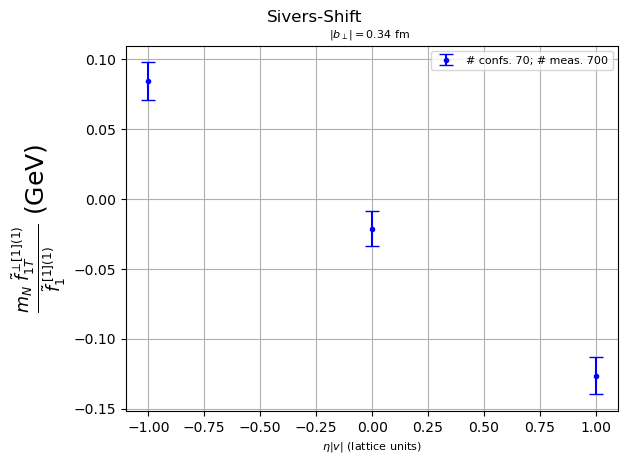

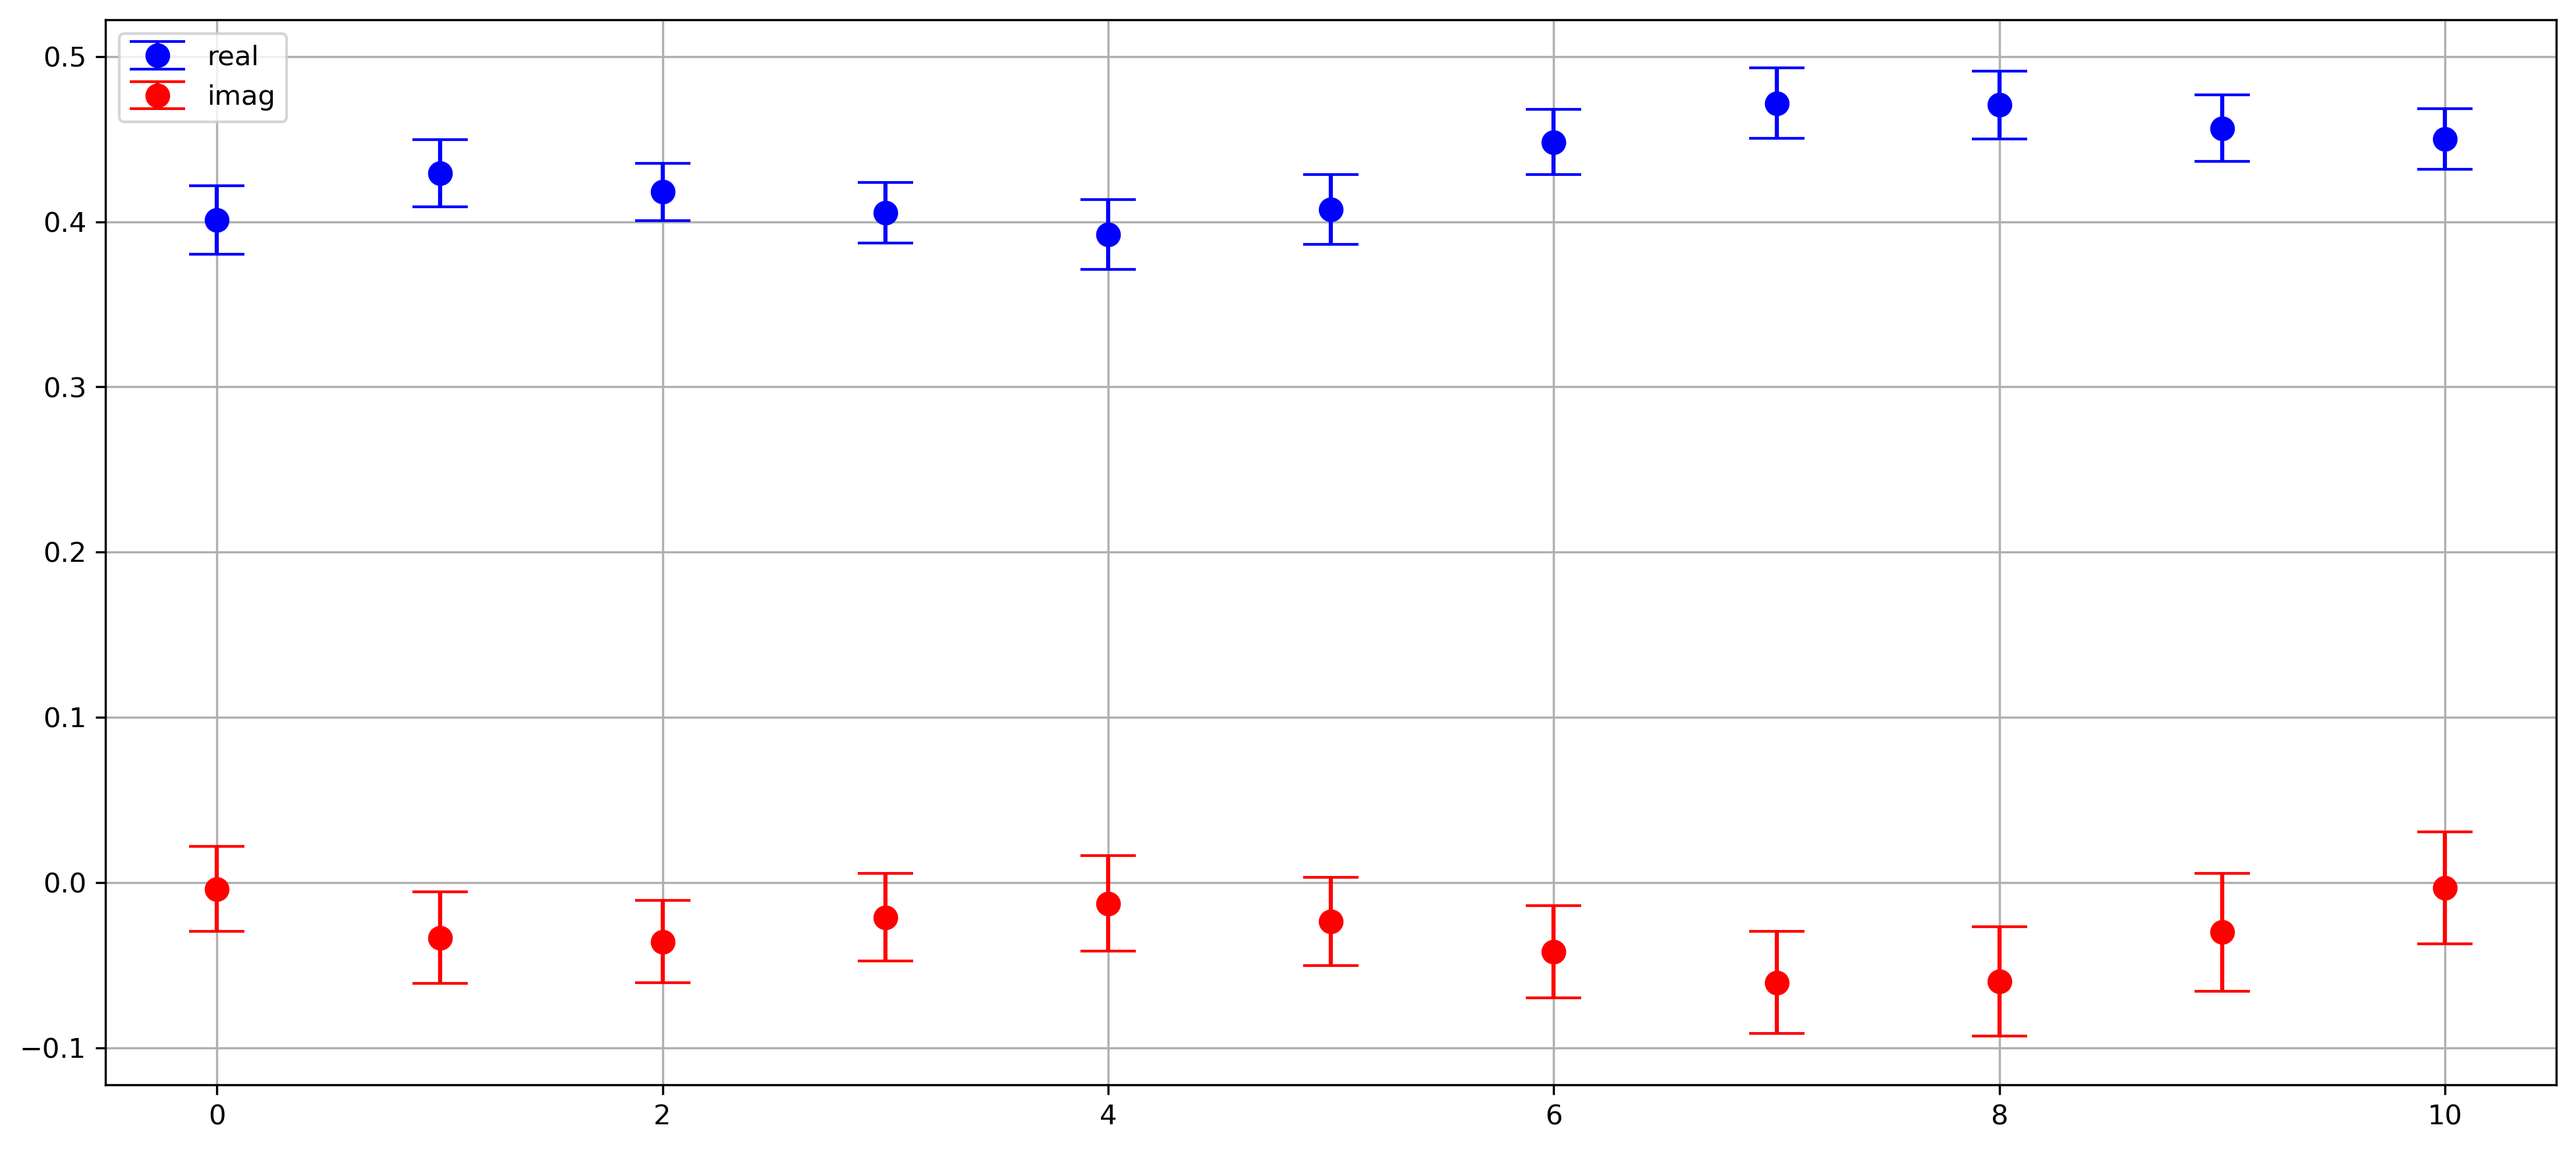

Siverse ratio: 0.039963 ± 0.013228 


(0.4425585770724897,
 0.01192873510624585,
 -0.053058223866148745,
 0.017601032760678474)

In [4]:

plot_Sivers_shift()
ratio_3pt_2pt_plateau_with_plot(5,7,6,8,0)